In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def cum_prob(func, begin, end, deltax, **kwargs):
    x = np.arange(begin, end, deltax)
    xprime = x + deltax
    if len(x) != len(xprime):
        raise ValueError("x and xprime must have the same length.")
    y = func(x, **kwargs)
    yprime = func(xprime, **kwargs)
    y_cum = np.sum(y+yprime) * deltax/2
    return y_cum

In [21]:
arr1 = np.arange(0, 10, 0.1)
arr2 = np.arange(0.1, 10.1, 0.1)
len(arr1), len(arr2)

(100, 100)

In [22]:
from scipy.stats import norm
def gauss_func(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)
mean = 1
sigma=2
area1 = cum_prob(gauss_func, mean-sigma, mean+sigma, 0.00001, mu=mean, sigma=sigma)
area2 = cum_prob(gauss_func, mean-2*sigma, mean+2*sigma, 0.00001, mu=mean, sigma=sigma)
print(area1)
print(area2)

0.6826894921369822
0.9544997360983536


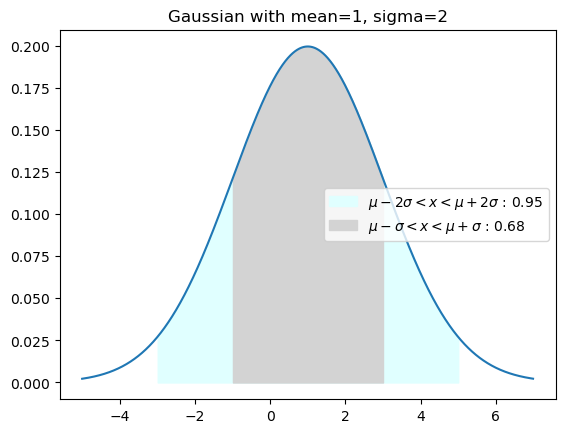

In [36]:
x = np.arange(-5,7,0.01)
plt.plot(x, gauss_func(x, mu=mean, sigma=sigma))
plt.fill_between(x, gauss_func(x, mu=mean, sigma=sigma), where=(x>mean-2*sigma) & (x<mean+2*sigma), color='lightcyan', \
                  label=f"$\mu-2\sigma < x < \mu+2\sigma$ : {area2:.2f}")
plt.fill_between(x, gauss_func(x, mu=mean, sigma=sigma), where=(x>mean-sigma) & (x<mean+sigma), color='lightgray', \
                  label=f"$\mu-\sigma < x < \mu+\sigma$ : {area1:.2f}")
plt.legend()
plt.title('Gaussian with mean=1, sigma=2')
plt.savefig('./figs/Assignment3-1')

In [33]:
xarr2 = np.arange(0., 7, 0.1)
xarrsig = xarr2 * sigma + mean
yarr2 = []
for i in range(len(xarrsig)):
    integrand = cum_prob(gauss_func, -20, xarrsig[i], 0.01, mu=mean, sigma=sigma)
    yarr2.append(integrand)
yarr2 = np.array(yarr2)
print(yarr2[yarr2>=0.95][0], xarr2[yarr2>=0.95][0])
print(yarr2[yarr2>=0.99][0], xarr2[yarr2>=0.99][0])

0.9554342041509893 1.7000000000000002
0.9918023521027715 2.4000000000000004


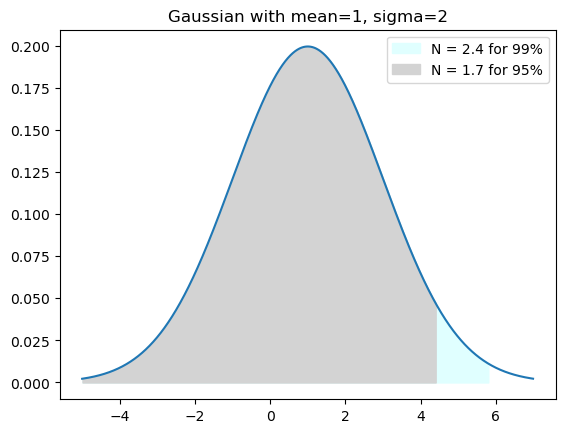

In [37]:
x = np.arange(-5,7,0.01)
plt.plot(x, gauss_func(x, mu=mean, sigma=sigma))
plt.fill_between(x, gauss_func(x, mu=mean, sigma=sigma), where=(x>-5) & (x<=2.4*sigma + mean), color='lightcyan', \
                  label="N = 2.4 for 99%")
plt.fill_between(x, gauss_func(x, mu=mean, sigma=sigma), where=(x>-5) & (x<mean+1.7*sigma), color='lightgray', \
                  label="N = 1.7 for 95%")
plt.legend()
plt.title('Gaussian with mean=1, sigma=2')
plt.savefig('./figs/Assignment3-2')

In [2]:
from func import *

data = np.loadtxt('mock_data_1.txt')


In [3]:
print(f'mean : {mean(data)}, std : {std(data)}')

mean : 2.498734561848052, std : 0.4985876036795086


In [28]:
def sample(n, iter, data):
    means = []
    stddev = []
    i = 0
    while i < iter:
        sample_data = np.random.choice(data, n, replace=False)
        means.append(mean(sample_data))
        stddev.append(std(sample_data))
        i += 1
    means = np.array(means)
    stddev = np.array(stddev)
    return means, stddev

In [35]:
means, stddev = sample(1000, 1, data)
print(f'sample mean : {means[0]}, sample std : {stddev[0]}')

sample mean : 2.497859530438701, sample std : 0.5140423756657071


In [36]:
means2, stddev2 = sample(100, 10, data)
print(f'sample mean : {mean(means2)}, sample std : {std(stddev2)}')

sample mean : 2.5250271679190184, sample std : 0.022621520255673898
